In [1]:
import pandas as pd
import random
student_df = pd.read_csv('https://userpage.fu-berlin.de/soga/200/2010_data_sets/students.csv')


# filter the students who are graduated
graduated_student_df = student_df[student_df['graduated'] == 1]

# random sample for 500 students 
unique_student_id = list(graduated_student_df['stud.id'].unique())
random.seed(30) # set a seed so that everytime we will extract same sample
sample_student_id = random.sample(unique_student_id, 500)
sample_df = graduated_student_df[graduated_student_df['stud.id'].isin(sample_student_id)].reset_index(drop=True)

# two variables of interest
sample_df = sample_df[['major', 'salary']]
groups = sample_df.groupby('major').count().reset_index()
# groups.plot(kind='bar',x='major',y='salary')
groups

,major,salary
0,Biology,87
1,Economics and Finance,94
2,Environmental Sciences,97
3,Mathematics and Statistics,75
4,Political Science,84
5,Social Sciences,63


In [84]:
sample_df = student_df[['major','salary']].dropna().reset_index().drop('index',axis=1)

In [86]:
sample_df

,major,salary
0,Economics and Finance,45254.108021
1,Environmental Sciences,40552.790243
2,Environmental Sciences,27007.030294
3,Political Science,33969.159268
4,Economics and Finance,50617.641870
5,Political Science,37391.872365
6,Mathematics and Statistics,35598.881686
7,Environmental Sciences,39703.744885
8,Political Science,30086.764812
9,Political Science,31494.320815


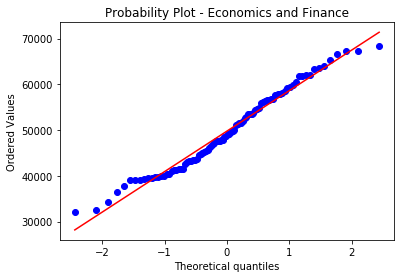

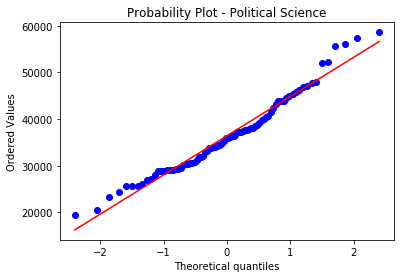

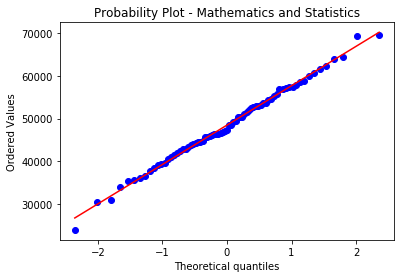

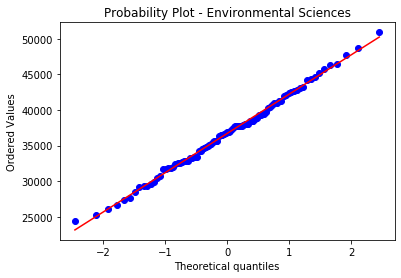

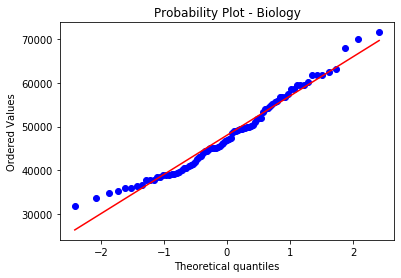

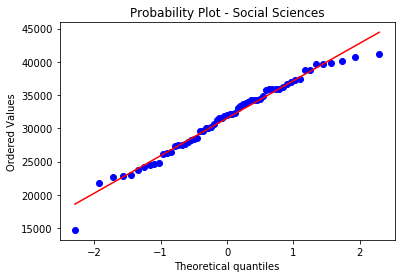

In [4]:
import numpy as np 
import scipy.stats as stats
import matplotlib.pyplot as plt

unique_majors = sample_df['major'].unique()
for major in unique_majors:
    stats.probplot(sample_df[sample_df['major'] == major]['salary'], dist="norm", plot=plt)
    plt.title("Probability Plot - " +  major)
    plt.show()

In [5]:
ratio = sample_df.groupby('major').std().max() / sample_df.groupby('major').std().min()
ratio

salary    1.669921
dtype: float64

In [7]:
# Create ANOVA backbone table
data = [['Between Groups', '', '', '', '', '', ''], ['Within Groups', '', '', '', '', '', ''], ['Total', '', '', '', '', '', '']] 
anova_table = pd.DataFrame(data, columns = ['Source of Variation', 'SS', 'df', 'MS', 'F', 'P-value', 'F crit']) 
anova_table.set_index('Source of Variation', inplace = True)

# calculate SSTR and update anova table
x_bar = sample_df['salary'].mean()
SSTR = sample_df.groupby('major').count() * (sample_df.groupby('major').mean() - x_bar)**2
anova_table['SS']['Between Groups'] = SSTR['salary'].sum()

# calculate SSE and update anova table
SSE = (sample_df.groupby('major').count() - 1) * sample_df.groupby('major').std()**2
anova_table['SS']['Within Groups'] = SSE['salary'].sum()

# calculate SSTR and update anova table
SSTR = SSTR['salary'].sum() + SSE['salary'].sum()
anova_table['SS']['Total'] = SSTR

# update degree of freedom
anova_table['df']['Between Groups'] = sample_df['major'].nunique() - 1
anova_table['df']['Within Groups'] = sample_df.shape[0] - sample_df['major'].nunique()
anova_table['df']['Total'] = sample_df.shape[0] - 1

# calculate MS
anova_table['MS'] = anova_table['SS'] / anova_table['df']

# calculate F 
F = anova_table['MS']['Between Groups'] / anova_table['MS']['Within Groups']
anova_table['F']['Between Groups'] = F

# p-value
anova_table['P-value']['Between Groups'] = 1 - stats.f.cdf(F, anova_table['df']['Between Groups'], anova_table['df']['Within Groups'])

# F critical 
alpha = 0.05
# possible types "right-tailed, left-tailed, two-tailed"
tail_hypothesis_type = "two-tailed"
if tail_hypothesis_type == "two-tailed":
    alpha /= 2
anova_table['F crit']['Between Groups'] = stats.f.ppf(1-alpha, anova_table['df']['Between Groups'], anova_table['df']['Within Groups'])

# Final ANOVA Table
anova_table

,SS,df,MS,F,P-value,F crit
Source of Variation,,,,,,
Between Groups,2.41841e+10,5,4.83682e+09,77.408,1.11022e-16,2.59218
Within Groups,3.08674e+10,494,6.24847e+07,,,
Total,5.50515e+10,499,1.10324e+08,,,


In [17]:
grouped = sample_df.groupby('major').agg(lambda x: list(x)).reset_index()
d = dict(zip(grouped['major'],grouped['salary']))
d.keys()

dict_keys(['Biology', 'Economics and Finance', 'Environmental Sciences', 'Mathematics and Statistics', 'Political Science', 'Social Sciences'])

In [20]:
from scipy.stats import f_oneway
stat, p = f_oneway(d['Biology'], d['Economics and Finance'], d['Environmental Sciences'],d['Mathematics and Statistics'],d['Political Science'],d['Social Sciences'])
stat,p

(77.40803685167349, 7.461055183208937e-60)

In [62]:
# Example of the Analysis of Variance Test
from scipy.stats import f_oneway
data1 = [0.873, 2.817, 0.121, -0.945, -0.055, -1.436, 0.360, -1.478, -1.637, -1.869]
data2 = [1.142, -0.432, -0.938, -0.729, -0.846, -0.157, 0.500, 1.183, -1.075, -0.169]
data3 = [-0.208, 0.696, 0.928, -1.148, -0.213, 0.229, 0.137, 0.269, -0.870, -1.204]
data = [data1,data2,data3]
stat, p = f_oneway(data1, data2, data3)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print('Probably the same distribution')
else:
	print('Probably different distributions')

stat=0.096, p=0.908
Probably the same distribution


In [ ]:
from scipy.stats import f

def one_way_anova(*data,alpha):
    F_stat,p_value = f_oneway(*data)
    F_critical = f.ppf(q=1-alpha, dfn=3, dfd=39)

In [73]:
from scipy.stats import f,f_oneway
def one_way_anova(*data,alpha):
    dfn = 0
    for j in data:
        dfn=dfn+1
    n_groups = dfn
    dfn = dfn-1
    total_elements = len([item for sublist in data for item in sublist]) #flatten data
    dfd = total_elements-n_groups
    F_stat,p_value = f_oneway(*data) #data is input as a list of lists
    F_critical = f.ppf(1-alpha,dfn,dfd)
    print('F_critical: {}, alpha: {}'.format(F_critical,alpha))
    if F_stat>F_critical and p_value<alpha:
        return 'Reject Null hypothesis with F_stat:{} & P_value:{}'.format(F_stat,p_value)
    else:
        return 'Fail to Reject Null hypothesis with F_stat:{} & P_value:{}'.format(F_stat,p_value)

In [75]:
data1 = [0.873, 2.817, 0.121, -0.945, -0.055, -1.436, 0.360, -1.478, -1.637, -1.869]
data2 = [1.142, -0.432, -0.938, -0.729, -0.846, -0.157, 0.500, 1.183, -1.075, -0.169]
data3 = [-0.208, 0.696, 0.928, -1.148, -0.213, 0.229, 0.137, 0.269, -0.870, -1.204]
data = [data1,data2,data3]
one_way_anova(*data,alpha=0.01)

F_critical: 5.488117768420701, alpha: 0.01


'Fail to Reject Null hypothesis with F_stat:0.09641783499925058 & P_value:0.9083957433926546'

In [76]:
grouped = sample_df.groupby('major').agg(lambda x: list(x)).reset_index()
grouped

,major,salary
0,Biology,"[49111.4274884341, 49476.0103536916, 39587.614..."
1,Economics and Finance,"[45254.1080206875, 43379.7783068337, 51518.154..."
2,Environmental Sciences,"[39703.744884975895, 32519.2240810446, 37803.5..."
3,Mathematics and Statistics,"[35598.8816863469, 64525.111547644905, 58670.8..."
4,Political Science,"[37391.8723653863, 30086.7648124516, 20511.150..."
5,Social Sciences,"[23717.356495955, 35881.7361997223, 39758.0509..."


In [79]:
data = list(grouped['salary'])
one_way_anova(*data,alpha=0.01)

F_critical: 3.054417173410919, alpha: 0.01


'Reject Null hypothesis with F_stat:77.40803685167349 & P_value:7.461055183208937e-60'

In [145]:
from scipy.stats import chisquare,chi2
def chi_square_test_GOF(data,alpha,dof):
    observed = data[0]
    expected = data[1]
    chi_square_stat, p_value = chisquare(f_obs=observed, f_exp=expected)
    chi_square_critical = chi2.ppf(1-alpha,dof)
    print('chi_square_critical {}, alpha: {}'.format(round(chi_square_critical,4),round(alpha,4)))
    text = "chi_square_stat: {}, p_value: {}, dof: {}".format(round(chi_square_stat,4),round(p_value,4),dof)
    if (chi_square_critical<chi_square_stat) and (p_value<alpha):
        return "Reject Null hypothesis "+text
    else:
        return "Fail to reject "+text

In [146]:
observed = [180,250,120,225,225]
expected = [sum(observed)/len(observed) for i in range(len(observed))]
data = [observed,expected]
print('Observed: ',observed)
print('Expected: ',expected)
chi_square_test_GOF(data,alpha=0.05,dof=4)

Observed:  [180, 250, 120, 225, 225]
Expected:  [200.0, 200.0, 200.0, 200.0, 200.0]
chi_square_critical 9.4877, alpha: 0.05


'Reject Null hypothesis chi_square_stat: 52.75, p_value: 0.0, dof: 4'

In [139]:
def chi_square_test_GOF2(data,alpha):
    obs = np.array([data[0],data[1]])
    chi_square_stat, p_value, dof, ex = chi2_contingency(obs)
    chi_square_critical = chi2.ppf(1-alpha,dof)
    print('chi_square_critical {}, alpha: {}'.format(round(chi_square_critical,4),round(alpha,4)))
    text = "chi_square_stat: {}, p_value: {}, dof: {}".format(round(chi_square_stat,4),round(p_value,4),dof)
    if (chi_square_critical<chi_square_stat) and (p_value<alpha):
        return "Reject Null hypothesis "+text
    else:
        return "Fail to reject "+text

59.0988

In [105]:
candy_data = pd.DataFrame({'flavor':['apple','lime','lime','orange','apple','grape'],'count':[10,15,4,9,22,13]})
candy_data

,flavor,count
0,apple,10
1,lime,15
2,lime,4
3,orange,9
4,apple,22
5,grape,13


In [106]:
candy_data.groupby('flavor').sum()

,count
flavor,
apple,32
grape,13
lime,19
orange,9


In [113]:
candy_data = pd.DataFrame({'flavor':['apple','lime','cherry','orange','grape'],'count':[180,250,120,225,225]})
candy_data = candy_data.groupby('flavor').sum()
candy_data['expected'] = candy_data['count'].sum()/len(candy_data.reset_index()['flavor'].unique())
candy_data

,count,expected
flavor,,
apple,180,200.0
cherry,120,200.0
grape,225,200.0
lime,250,200.0
orange,225,200.0


In [149]:
import pandas as pd
import researchpy as rp
import scipy.stats as stats

# To load a sample dataset for this demonstration
import statsmodels.api as sm

df = sm.datasets.webuse("citytemp2")
df.head()

,division,region,heatdd,cooldd,tempjan,tempjuly,agecat
0,N. Eng.,NE,NaN,NaN,16.600000,69.599998,19-29
1,N. Eng.,NE,7947.0,250.0,18.200001,68.000000,19-29
2,Mid Atl,NE,7480.0,424.0,18.400000,70.199997,19-29
3,N. Eng.,NE,7482.0,353.0,19.900000,69.500000,19-29
4,N. Eng.,NE,7482.0,353.0,19.900000,69.500000,19-29


In [193]:
data = pd.crosstab(df["region"], df["agecat"])
data

agecat,19-29,30-34,35+
region,,,
NE,46,83,37
N Cntrl,162,92,30
South,139,68,43
West,160,73,23


In [191]:
obs = crosstab
chi_square_stat, p_value, dof, ex = chi2_contingency(obs)
alpha=0.01
chi_square_critical = chi2.ppf(1-alpha,dof)
chi_square_critical
print(p_value,chi_square_stat,dof)

2.463382670201326e-11 61.28767688406036 6


In [188]:
from scipy.stats import chi2_contingency,chi2
def chi_square_independence(data,alpha):
    chi_square_stat, p_value, dof, ex = chi2_contingency(data)
    chi_square_critical = chi2.ppf(1-alpha,dof)
    print('chi_square_critical {}, alpha: {}'.format(round(chi_square_critical,4),round(alpha,4)))
    text = "chi_square_stat: {}, p_value: {}, dof: {}".format(round(chi_square_stat,4),round(p_value,4),dof)
    if (chi_square_critical<chi_square_stat) and (p_value<alpha):
        return "Reject Null hypothesis "+text
    else:
        return "Fail to reject "+text

In [195]:
df = sm.datasets.webuse("citytemp2")
df.head()

,division,region,heatdd,cooldd,tempjan,tempjuly,agecat
0,N. Eng.,NE,NaN,NaN,16.600000,69.599998,19-29
1,N. Eng.,NE,7947.0,250.0,18.200001,68.000000,19-29
2,Mid Atl,NE,7480.0,424.0,18.400000,70.199997,19-29
3,N. Eng.,NE,7482.0,353.0,19.900000,69.500000,19-29
4,N. Eng.,NE,7482.0,353.0,19.900000,69.500000,19-29


In [196]:
data = pd.crosstab(df["region"], df["agecat"])
data

agecat,19-29,30-34,35+
region,,,
NE,46,83,37
N Cntrl,162,92,30
South,139,68,43
West,160,73,23


In [197]:
chi_square_independence(data,alpha=0.01)

chi_square_critical 16.8119, alpha: 0.01


'Reject Null hypothesis chi_square_stat: 61.2877, p_value: 0.0, dof: 6'

In [5]:
import pandas as pd

df = pd.read_csv('house-prices-advanced-regression-techniques/train.csv').drop('Id',axis=1)
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


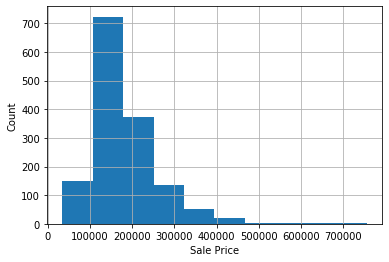

In [4]:
import matplotlib.pyplot as plt
df['SalePrice'].hist()
plt.xlabel('Sale Price')
plt.ylabel('Count')
plt.show()

In [7]:
df.head().transpose()

,0,1,2,3,4
MSSubClass,60,20,60,70,60
MSZoning,RL,RL,RL,RL,RL
LotFrontage,65,80,68,60,84
LotArea,8450,9600,11250,9550,14260
Street,Pave,Pave,Pave,Pave,Pave
Alley,NaN,NaN,NaN,NaN,NaN
LotShape,Reg,Reg,IR1,IR1,IR1
LandContour,Lvl,Lvl,Lvl,Lvl,Lvl
Utilities,AllPub,AllPub,AllPub,AllPub,AllPub
LotConfig,Inside,FR2,Inside,Corner,FR2


In [8]:
cols = ['YrSold','MoSold','TotRmsAbvGrd','BedroomAbvGr','Fireplaces','GarageYrBlt','MasVnrArea','MiscVal','GarageArea']
len(cols)

9

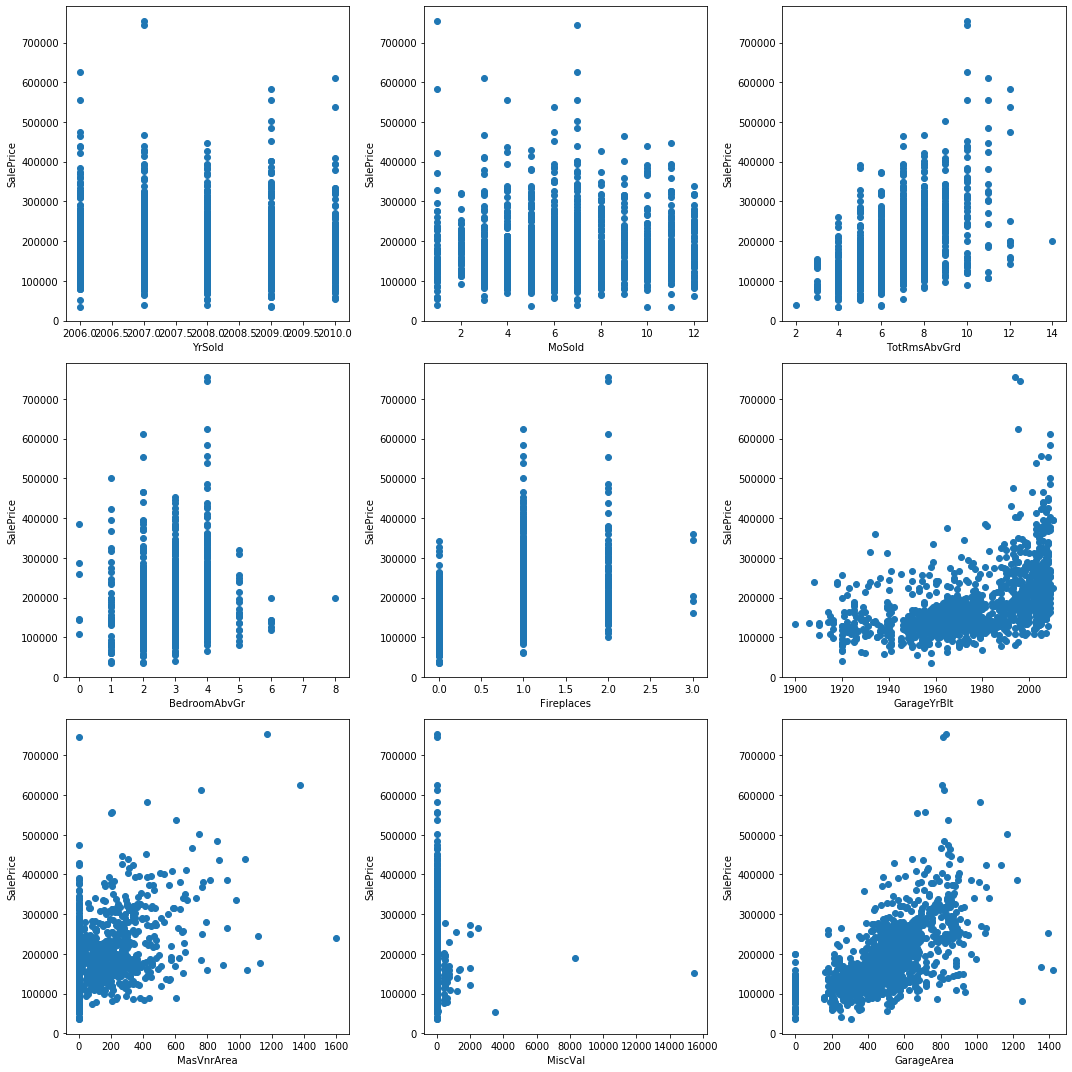

In [31]:
import matplotlib.pyplot as plt
columns = ['YrSold','MoSold','TotRmsAbvGrd','BedroomAbvGr','Fireplaces',
           'GarageYrBlt','MasVnrArea','MiscVal','GarageArea']
n=1
plt.subplots(nrows=3, ncols=3, figsize=(15, 15))
plt.subplots_adjust(hspace=3,wspace=1.5)
for col in columns:
    plt.subplot(3,3,n)
    plt.scatter(df[col],df['SalePrice'])
    plt.xlabel(col)
    plt.ylabel('SalePrice')
    n=n+1
plt.tight_layout()
plt.show()

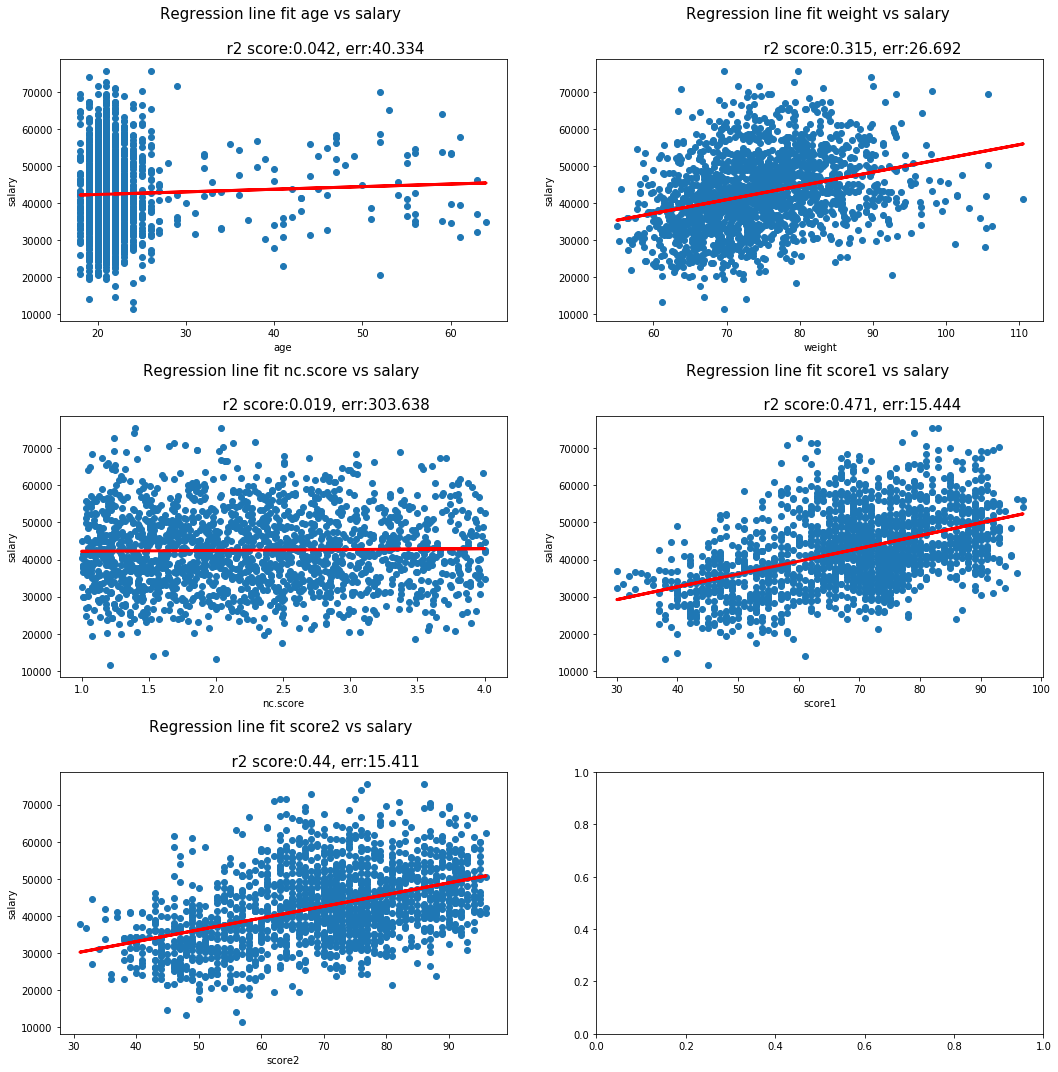

In [47]:
from scipy import stats
import matplotlib.pyplot as plt
data = student_df[['age','weight','nc.score','score1','score2','salary']].dropna()
target='salary'
n=1
plt.subplots(nrows=3, ncols=2, figsize=(15, 15))
plt.subplots_adjust(hspace=3,wspace=1.5)
for col in data.columns:
    if col!=target:
        plt.subplot(3,2,n)
        plt.scatter(data[col],data[target])
        slope, intercept, r_value, p_value, std_err = stats.linregress(data[col],data[target])
        line = slope*data[col]+intercept
        plt.plot(data[col],line,color='red',linewidth=3)
        plt.title('''Regression line fit {} vs {} \n 
                  r2 score:{}, err:{}'''.format(col,target,round(r_value,3),round(std_err,3)),fontsize=15)
        plt.xlabel(col)
        plt.ylabel(target)
        n=n+1
plt.tight_layout()
plt.show()

In [52]:
df[['BldgType','SalePrice']].head()

,BldgType,SalePrice
0,1Fam,208500
1,1Fam,181500
2,1Fam,223500
3,1Fam,140000
4,1Fam,250000


In [59]:
df_categorical = pd.get_dummies(df['BldgType'])
df_categorical.drop(df_categorical.columns[-1],axis=1,inplace=True)
df_categorical

,1Fam,2fmCon,Duplex,Twnhs
0,1,0,0,0
1,1,0,0,0
2,1,0,0,0
3,1,0,0,0
4,1,0,0,0
5,1,0,0,0
6,1,0,0,0
7,1,0,0,0
8,1,0,0,0
9,0,1,0,0


In [65]:
numerical_features = ['LotArea','LotFrontage','MiscVal']
df_numerical = df[numerical_features]

In [66]:
data = pd.concat([df_categorical,df_numerical],axis=1)
data

,1Fam,2fmCon,Duplex,Twnhs,LotArea,LotFrontage,MiscVal
0,1,0,0,0,8450,65.0,0
1,1,0,0,0,9600,80.0,0
2,1,0,0,0,11250,68.0,0
3,1,0,0,0,9550,60.0,0
4,1,0,0,0,14260,84.0,0
5,1,0,0,0,14115,85.0,700
6,1,0,0,0,10084,75.0,0
7,1,0,0,0,10382,NaN,350
8,1,0,0,0,6120,51.0,0
9,0,1,0,0,7420,50.0,0
